In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드 (인코딩: utf-8)
file_path = 'data/신용카드사용액raw.csv'
# 'utf-8' 오류가 났으므로 'cp949'로 시도합니다.
# 만약 'cp949'도 안 되면 'euc-kr'을 써보세요.
try:
    df_raw = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    df_raw = pd.read_csv(file_path, encoding='euc-kr')

In [ ]:
# 데이터 전처리 (가로 -> 세로 변환)
# '합계' 행의 데이터를 추출 (첫 번째 행)
# 날짜 컬럼은 3번째 컬럼(index 2)부터 시작합니다.
dates = df_raw.columns[2:]
values = df_raw.iloc[0, 2:].values

In [5]:
# 데이터프레임 생성
df = pd.DataFrame({'Card_Spending': values}, index=dates)
df.index.name = '날짜'

In [6]:
# 날짜 형식 변환 (예: '2010/01' -> '2010-01-01')
df.index = pd.to_datetime(df.index, format='%Y/%m')
df = df.sort_index()

In [7]:
# 숫자 변환
df['Card_Spending'] = pd.to_numeric(df['Card_Spending'])

In [9]:
# 12개월 누적 로그 변화율 계산 (성장률)
# 공식: ln(현재 사용액) - ln(12개월 전 사용액)
df['log_val'] = np.log(df['Card_Spending'])
df['12m_log_return'] = df['log_val'].diff(12)

In [10]:
# Z-Score 계산
# 소비 지표이므로 높을수록 호재(+)로 판단합니다.
mean_val = df['12m_log_return'].mean()
std_val = df['12m_log_return'].std()

df['z_score'] = (df['12m_log_return'] - mean_val) / std_val

In [11]:
# CSV 파일 저장
output_filename = 'data/Z_score지수/Credit_Card_Spending_Z_Score.csv'
df.to_csv(output_filename, encoding='utf-8-sig')
print(f"'{output_filename}' 파일이 저장되었습니다.")

'Credit_Card_Spending_Z_Score.csv' 파일이 저장되었습니다.


In [12]:
# 결과 확인
print(df[['Card_Spending', '12m_log_return', 'z_score']].tail())

            Card_Spending  12m_log_return   z_score
날짜                                                 
2025-07-01       94958632        0.053026 -0.012877
2025-08-01       91516719        0.033531 -0.437361
2025-09-01       95364571        0.067959  0.312288
2025-10-01       92592210        0.016660 -0.804692
2025-11-01       93619698        0.044298 -0.202906


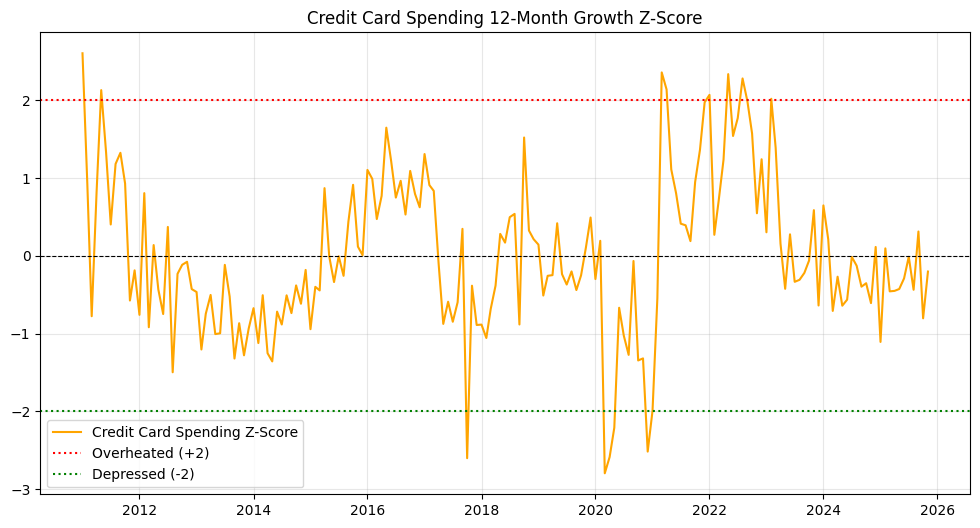

In [13]:
# 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['z_score'], label='Credit Card Spending Z-Score', color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='Overheated (+2)')
plt.axhline(-2, color='green', linestyle=':', label='Depressed (-2)')
plt.title('Credit Card Spending 12-Month Growth Z-Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()